#### Final code for constructing social duplexes. 
###### The numbers match with Xie's data, but not with Ovidia's data. 
###### Ovidia's data has 14 groups and Xie's has 10. 
###### The common groups between Ovidia, Xie and me match

In [24]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from pylab import *
#from drawnow import drawnow, figure

In [25]:
# define functions

def construct_graph(f_name):
    ''' given the filename, this function constructs the corresponding graph, 
    and outputs the list of node-ids and # of edges'''
    
    import numpy as np
    import networkx as nx
    
    g_data = np.loadtxt(f_name)
    
    # find unique entries 
    v = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
    v = np.unique(np.asarray(v))
    #n_nodes = len(v)
    n_edges = np.shape(g_data)[0]
    
    G = nx.DiGraph()
    G.add_nodes_from(v)
    G.add_edges_from(g_data)

    return v, n_edges, G

def insert_missing_nodes(M0, all_nodes, mis_nodes):
    ''' inserts zero row and column at missing node-indices
        Output: 
        Mnew:   new matrix with padded rows and columns
    '''
    #print(len(mis_nodes))
    
    for ix in range(len(mis_nodes)):
     #   print(ix)
        index = np.argwhere(mis_nodes[ix] == all_nodes).flatten()
        #print(index)
        Mnew = np.insert(np.insert( M0, index, 0, 0 ), index, 0,1)
        M0 = Mnew
        
    return Mnew

# make aggregate graph
def aggregate_graph(listname, str1, node_list): 
    '''  create two layers of the social duplex networks
    INPUT 
    max_id: id of the layer which contains max number of nodes
    list1:  list containing the names of layers to be aggregated 
    group_id:   id of the group for which duplex is to be created 
    node_list: list of nodes in the layer that has maximum nodes
    
    OUTPUT: 
    Agg_A : Aggregated layer
    
    '''    
    str3 = '.txt'

    num_nodes = len(node_list)
    Agg_A = np.zeros((num_nodes,num_nodes)) # graph that aggregates all layers
   
    for item in range(len(listname)):   
        Anew = np.empty((num_nodes,num_nodes))  # An array to store the padded graph 
        fname = str1 + listname[item] + str3
        
        # call function to construct graph
        [v, n_edges, G] = construct_graph(fname)
        # find missing nodes by comparing node_ids and v
        ids = np.setdiff1d(node_ids,v)
    
        # make first graph which would later be padded by zero rows and cols
        A0 =  nx.adjacency_matrix(G).todense()
       
        if np.shape(ids)[0] == 0:
            Anew = A0
        else:
            Anew = insert_missing_nodes(A0, node_ids, ids)
    
        
        Agg_A = Agg_A + Anew
        
        
    return Agg_A
    

In [26]:
# calculate the number of nodes in each group and layer
s1 = 'g'
str3 = '.txt'
g_list = [1,2,3,4,6,10,10,11,14,15]
str_list = ['c','c', 'p', 'c','c', 'c', 'p', 'p','p', 'p']

Players = ['influence', 'leaders']
Slayers = ['like','closest',  'interact', 'goToBad', 'goToGood', 'comeForBad'] 

super_list = Slayers + Players
layer_node_vec = np.empty([len(g_list), len(super_list)] , dtype = int)  # stores the number of nodes for all layers in all groups

for igroup in range(len(g_list)):
    str1 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'  
    
    layer_nodes= []
    for item in super_list:
        fname = str1 + item + str3
        #print(fname)
        g_data = np.loadtxt(fname)
        v = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
        v = np.unique(np.asarray(v))
        layer_nodes.append(len(v))
    layer_node_vec[igroup] = layer_nodes
    #print(layer_nodes)
    #del layer_nodes

#print(np.shape(layer_node_vec))
#print(np.shape(g_list))
#print(np.shape(super_list))

gids = []   # make a dataframe with the array layer_node_vec to be saved and checked with Ovidia/Eun/Xie
for igroup in range(len(g_list)):
    str1= 'g' + str(g_list[igroup]) + str(str_list[igroup])
    gids.append(str1)
    
df = pd.DataFrame(layer_node_vec, columns = super_list)
df.head()
print(gids)
df.rename(index= {0: gids[0], 1: gids[1],2: gids[2], 3: gids[3],4: gids[4], 5: gids[5],
                 6: gids[6], 7: gids[7], 8: gids[8], 9: gids[9]})

['g1c', 'g2c', 'g3p', 'g4c', 'g6c', 'g10c', 'g10p', 'g11p', 'g14p', 'g15p']


,like,closest,interact,goToBad,goToGood,comeForBad,influence,leaders
g1c,21,21,21,21,21,21,21,21
g2c,29,29,29,27,28,28,29,29
g3p,32,32,32,32,32,31,32,32
g4c,58,57,57,54,55,57,57,57
g6c,26,26,26,26,26,26,26,26
g10c,19,19,19,15,16,14,19,19
g10p,19,19,19,19,19,18,19,19
g11p,23,23,23,23,23,23,23,23
g14p,31,31,31,31,31,31,30,30
g15p,43,43,43,42,43,42,42,43


In [27]:
len(str_list)

10

[array([227., 228., 229., 230., 231., 232., 233., 234., 235., 236., 237.,
       238., 239., 240., 241., 242., 243., 244., 245., 246., 247., 248.,
       249., 250., 251., 252., 253., 254., 256.]), 29]
[array([227., 229., 230., 231., 232., 234., 235., 236., 237., 238., 239.,
       240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250.,
       251., 252., 253., 254., 256.]), 27]


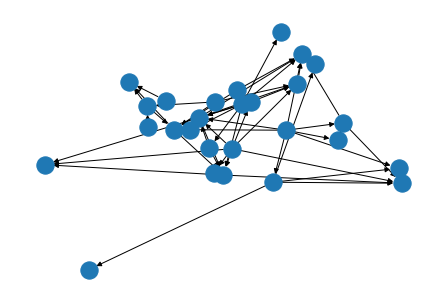

In [28]:
# check all functions for individual groups
s1 = 'g'
igroup =1

# get the index of layer with maximum nodes in the group
max_id = np.argmax(layer_node_vec[igroup])

# get node_ids from the maximum nodes-layer : use super_list for this
str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname0 = str0 + super_list[max_id] + str3
g_data = np.loadtxt(fname0)

node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
node_ids = np.unique(np.asarray(node_ids))

# check a different layer that has less number of nodes
str1 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname = str1 + super_list[3] + str3

# check that graph is contructed properly and missing nodes are calculated correctly
[v, n_edges, G] = construct_graph(fname)
print([node_ids, len(node_ids)])
print([v, len(v)])
ids = np.setdiff1d(node_ids,v)
nx.draw(G)
#super_list[max_id]
#sns.heatmap(nx.adjacency_matrix(G).todense())


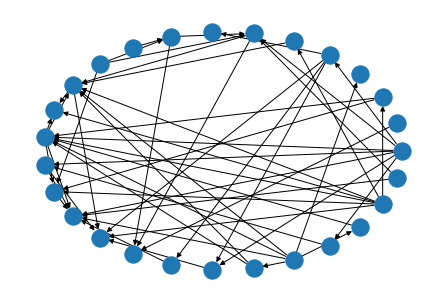

In [35]:
nx.draw(G,pos = nx.circular_layout(G))

In [6]:
# check that missing nodes are inserted correctly 
A = nx.adjacency_matrix(G).todense()
Anew = insert_missing_nodes(A, node_ids, ids)
np.shape(Anew)
#fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
#sns.heatmap(A, ax = axes[0])
#sns.heatmap(Anew, ax= axes[1])
print(ids)


[228. 233.]


In [7]:
print(g_list)
print(str_list)


[1, 2, 3, 4, 6, 10, 10, 11, 14, 15]
['c', 'c', 'p', 'c', 'c', 'c', 'p', 'p', 'p', 'p']


[29, 29]
[29, 29]
[29, 29]
[27, 29]
[28, 29]
[28, 29]


<AxesSubplot:>

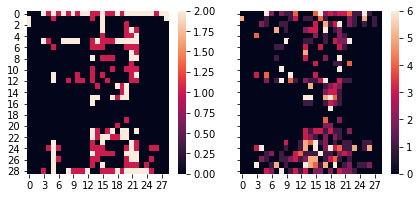

In [9]:
# check that layers are aggregated properly 
super_list[0:-2]
layer_node_vec[igroup,0:-2]
str1 = 'g2c_'
igroup = 1
# find the maximum node-list
max_id = np.argmax(layer_node_vec[igroup])
str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname0 = str0 + super_list[max_id] + str3
g_data = np.loadtxt(fname0)

# get node_ids from the maximum nodes-layer
node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
node_ids = np.unique(np.asarray(node_ids))
    
#aggregate_graph(Slayers, str1, node_ids)
#len(node_ids)
num_nodes = len(node_ids)
#### inner lines of the function 'aggregate_graph' to decode
Agg_A = np.zeros((num_nodes,num_nodes)) # graph that aggregates all layers
for item in range(len(Slayers)):  
    Anew = np.empty((num_nodes,num_nodes))  # An array to store the padded graph 
    #print(len(Anew))
    #str1 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
    fname = str1 + Slayers[item] + str3
    [v, n_edges, G] = construct_graph(fname)
    # find missing nodes by comparing node_ids and v
    ids = np.setdiff1d(node_ids,v)
    
    A0 =  nx.adjacency_matrix(G).todense()
    #print(len(A0))       
    if np.shape(ids)[0] == 0:
        Anew = A0
    else:
        Anew = insert_missing_nodes(A0, node_ids, ids)
        
    print([len(A0), len(Anew)])

#str1 = 'g2c_'
lPower = aggregate_graph(Players, str1, node_ids)
lSocial = aggregate_graph(Slayers, str1, node_ids)
fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
sns.heatmap(lPower, ax = axes[0])
sns.heatmap(lSocial, ax= axes[1])

### Steps: 
### (i)  assign the name of group and change igroup accordingly 
### (ii) find the index of maximum nodes layer from layer_node_vec[igroup,: ], then call that layer and find node_ids
### (iii) update the value of num_nodes 
### (iv)  Then call aggregate_graph


['g1c_', 21, 21, 21]
['g2c_', 29, 29, 29]
['g3p_', 32, 32, 32]
['g4c_', 58, 58, 58]
['g6c_', 26, 26, 26]
['g10c_', 19, 19, 19]
['g10p_', 19, 19, 19]
['g11p_', 23, 23, 23]
['g14p_', 31, 31, 31]
['g15p_', 43, 43, 43]


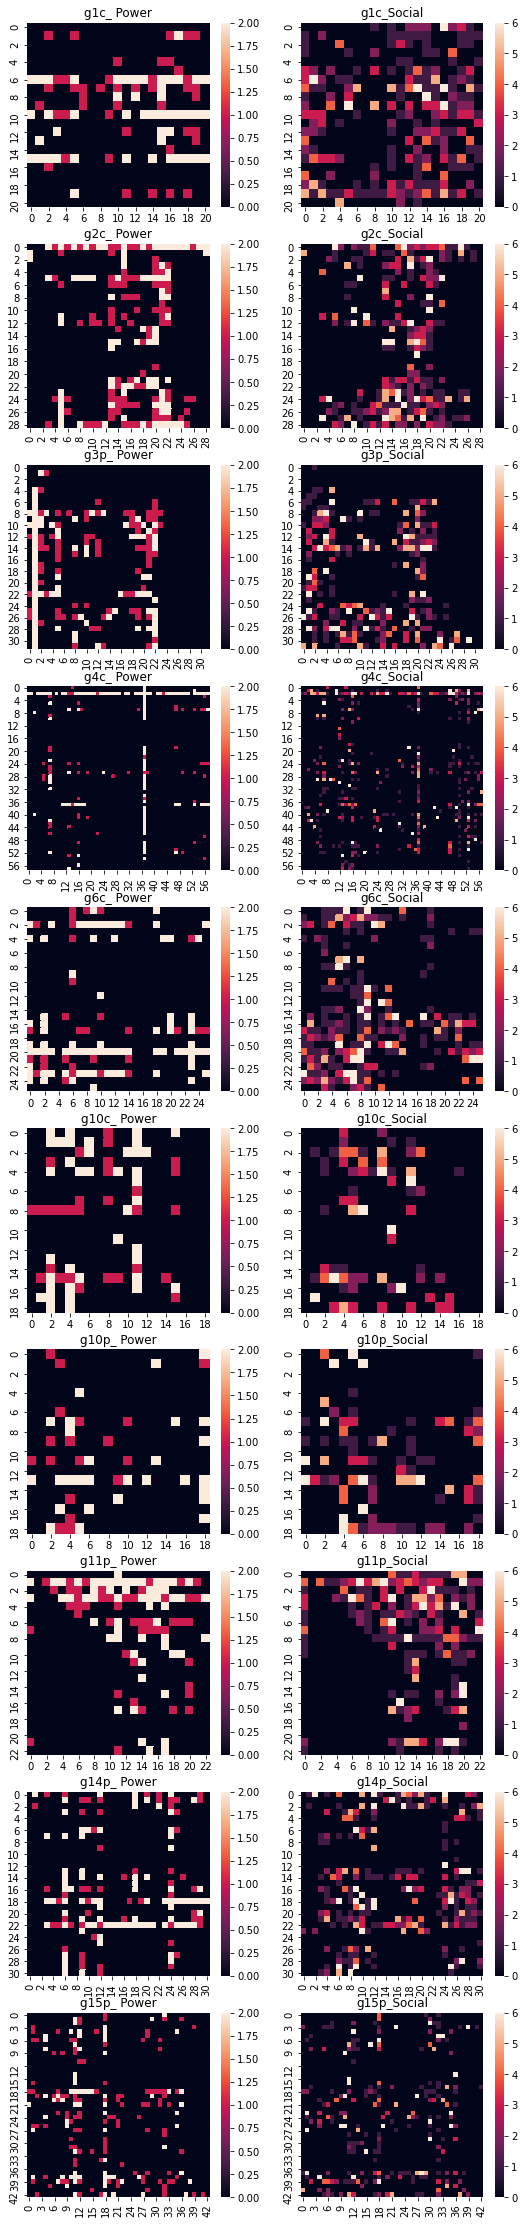

In [51]:
fig, axes = plt.subplots(10, 2, figsize=(9, 40), sharey=False)
for igroup in range(len(g_list)):

    str1 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'  
    
    # find the maximum node-list
    max_id = np.argmax(layer_node_vec[igroup])
    str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
    fname0 = str0 + super_list[max_id] + str3
    g_data = np.loadtxt(fname0)

    # get node_ids from the maximum nodes-layer
    node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
    node_ids = np.unique(np.asarray(node_ids))
    
    lPower = aggregate_graph(Players, str1, node_ids)
    lSocial = aggregate_graph(Slayers, str1, node_ids)
    
    print([str1, len(lPower), len(node_ids), len(lSocial)])
    np.savetxt(str1 + 'power' + '.txt',lPower,fmt='%.2f')
    np.savetxt(str1 + 'affiliation' + '.txt',lSocial,fmt='%.2f')
    
    
    sns.heatmap(lPower, ax = axes[igroup, 0])
    axes[igroup,0].set_title(str1 + ' Power')
    
    sns.heatmap(lSocial, ax= axes[igroup, 1])
    axes[igroup,1].set_title(str1 + 'Social' )
    #axes[igroup,1].set_xlabel(str1)
plt.savefig('Duplex_layers.pdf')

G_asym = nx.from_numpy_matrix(Agg_G, create_using = nx.DiGraph)

In [83]:
igroup = 0 
str1 = 'g1c_'
# find the maximum node-list
max_id = np.argmax(layer_node_vec[igroup])
str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname0 = str0 + super_list[max_id] + str3
g_data = np.loadtxt(fname0)

# get node_ids from the maximum nodes-layer
node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
node_ids = np.unique(np.asarray(node_ids))
    
lPower = aggregate_graph(Players, str1, node_ids)
lSocial = aggregate_graph(Slayers, str1, node_ids)
    

In [84]:
G_power = nx.from_numpy_matrix(lPower, create_using = nx.DiGraph)
G_social = nx.from_numpy_matrix(lSocial, create_using = nx.DiGraph)

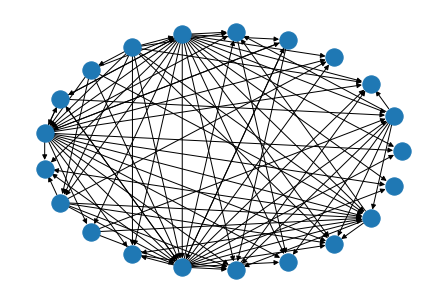

In [85]:
nx.draw(G_power, pos=nx.circular_layout(G_power))

#### visualizing graphs

Text(0.5, 1.0, 'Leaders')

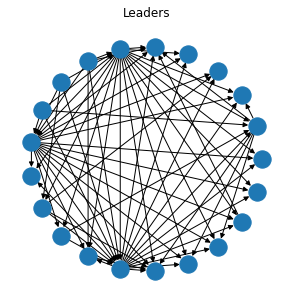

In [65]:
# check that plotting works for one case:

listname = Players
igroup = 0
str1 = 'g1c_'
str2 = '.txt'
num_nodes = np.max(layer_node_vec[igroup])
item = 1

Anew = np.empty((num_nodes,num_nodes))  # An array to store the padded graph 
fname = str1 + listname[item] + str3

# find the maximum node-list
max_id = np.argmax(layer_node_vec[igroup])
str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname0 = str0 + super_list[max_id] + str3
g_data = np.loadtxt(fname0)

# get node_ids from the maximum nodes-layer
node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
node_ids = np.unique(np.asarray(node_ids))


# call function to construct graph
[v, n_edges, G] = construct_graph(fname)
# find missing nodes by comparing node_ids and v
ids = np.setdiff1d(node_ids,v)
    
# make first graph which would later be padded by zero rows and cols
A0 =  nx.adjacency_matrix(G).todense()
       
if np.shape(ids)[0] == 0:
    Anew = A0
else:
    Anew = insert_missing_nodes(A0, node_ids, ids)
 

fig, axes = plt.subplots(1, 1, figsize=(5,5), sharey=False)
Gnew = nx.from_numpy_matrix(Anew, create_using = nx.DiGraph)
nx.draw( Gnew, pos=nx.circular_layout(Gnew))
axes.set_title('Leaders')    

In [76]:
# convert the above in a definition 

def plot_graphs(str1, str3, listname, node_ids): 
    
    num_layers = len(listname)
    fig, axes = plt.subplots(1, num_layers, figsize=(3*num_layers + 2, 3), sharey=False)
    
    for nl in range(num_layers):
       
        Anew = np.empty((num_nodes,num_nodes))  # An array to store the padded graph 
        fname = str1 + listname[nl] + str3
        
        # call function to construct graph
        [v, n_edges, G] = construct_graph(fname)
        # find missing nodes by comparing node_ids and v
        ids = np.setdiff1d(node_ids,v)
    
        # make first graph which would later be padded by zero rows and cols
        A0 =  nx.adjacency_matrix(G).todense()
        if np.shape(ids)[0] == 0:
            Anew = A0
        else:
            Anew = insert_missing_nodes(A0, node_ids, ids)
        
        Gnew = nx.from_numpy_matrix(Anew, create_using = nx.DiGraph)
        print(nl)
        nx.draw( Gnew, pos=nx.circular_layout(Gnew),ax = axes[nl])
        axes[nl].set_title(listname[nl])    

0
1


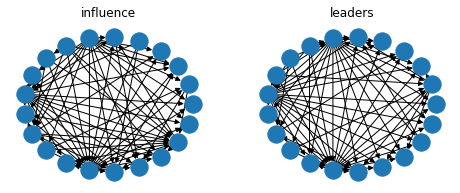

In [80]:
# specify group and list
# find the maximum node-list
igroup = 0
max_id = np.argmax(layer_node_vec[igroup])
num_nodes = np.max(layer_node_vec[igroup])
str0 = s1 + str(g_list[igroup]) + str(str_list[igroup]) + '_'
fname0 = str0 + super_list[max_id] + str3
g_data = np.loadtxt(fname0)

# get node_ids from the maximum nodes-layer
node_ids = np.unique(g_data[:,0]).tolist() +np.unique(g_data[:,1]).tolist() 
node_ids = np.unique(np.asarray(node_ids))

plot_graphs('g1c_', '.txt', Players, node_ids)
plt.savefig('g1c_Power_graphs.pdf')

0
1
2
3
4
5


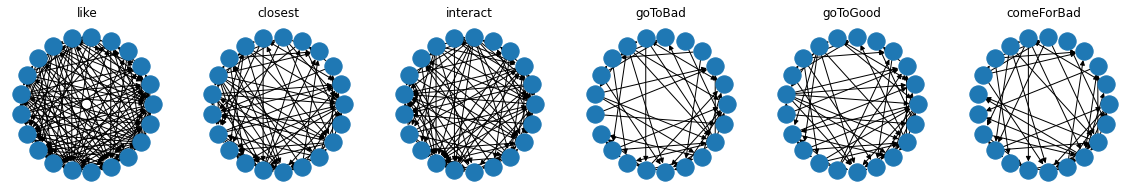

In [79]:
plot_graphs('g1c_', '.txt', Slayers, node_ids)
plt.savefig('g1c_Social_graphs.pdf')

print(Slayer)

In [81]:
lPower = aggregate_graph(Players, str1, node_ids)
lSocial = aggregate_graph(Slayers, str1, node_ids)


['like', 'closest', 'interact', 'goToBad', 'goToGood', 'comeForBad']


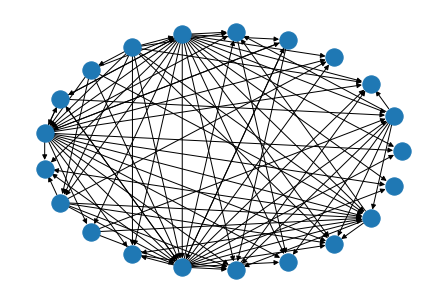

In [89]:
nx.draw(G_power, pos=nx.circular_layout(G_power))
plt.savefig('g1c_power_graphs.pdf')

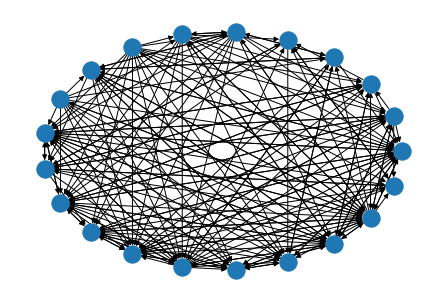

In [90]:
nx.draw(G_social, pos=nx.circular_layout(G_social))
plt.savefig('g1c_social_graphs.pdf')